In [22]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


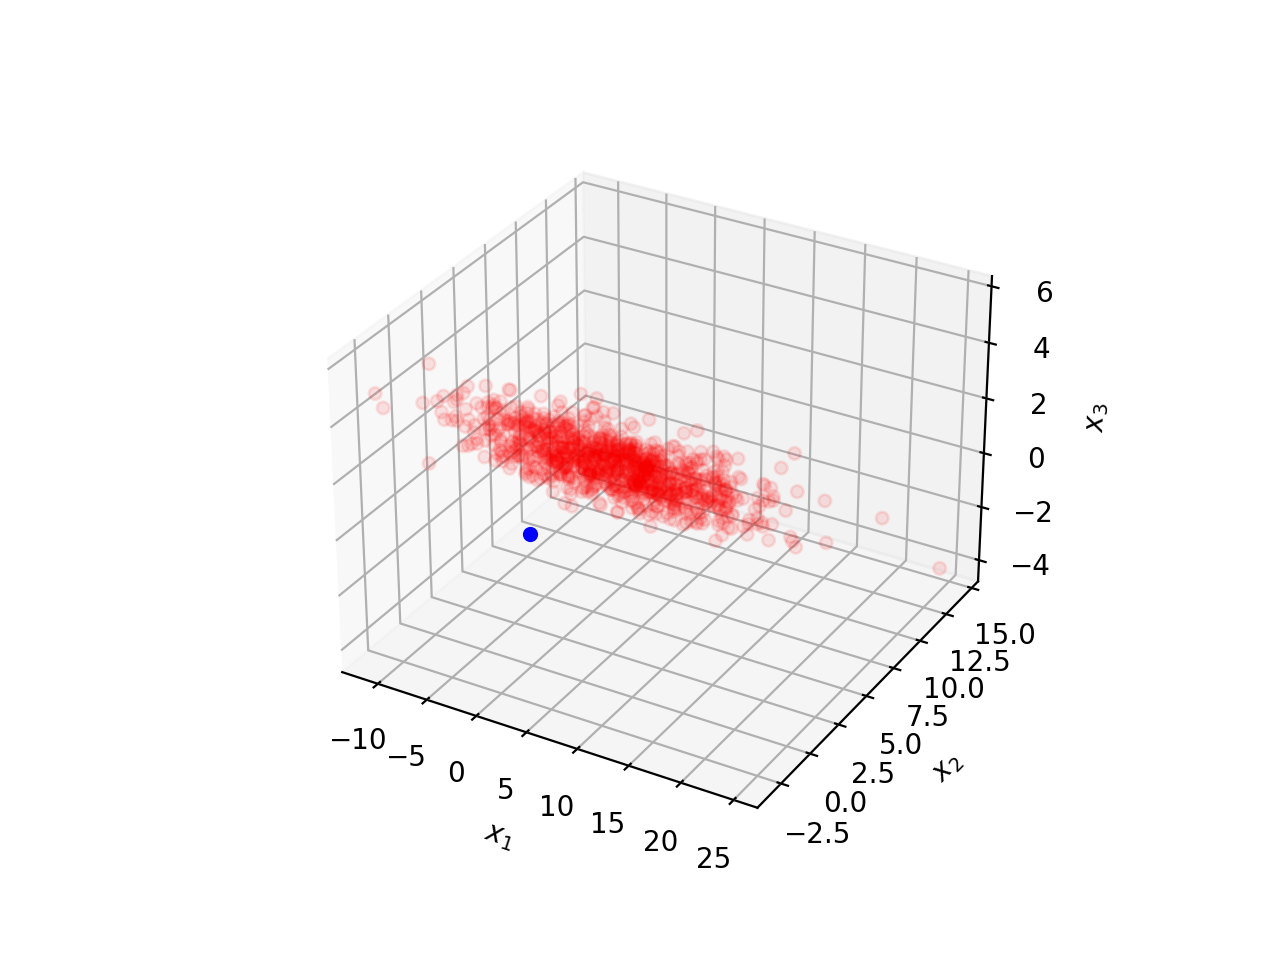

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

Problem 2a comment:

The data appears to be well represented by a low-dimensional plane, but not a subspace.
This is because a subspace necessarily must include the origin
and this data does not appear to be centered on the origin.



Problem 2b comment:

You could subtract the mean from every point in the dataset to center
the data on the origin.



In [24]:
# Subtract mean
X_m = X - np.mean(X, 0)

<IPython.core.display.Javascript object>


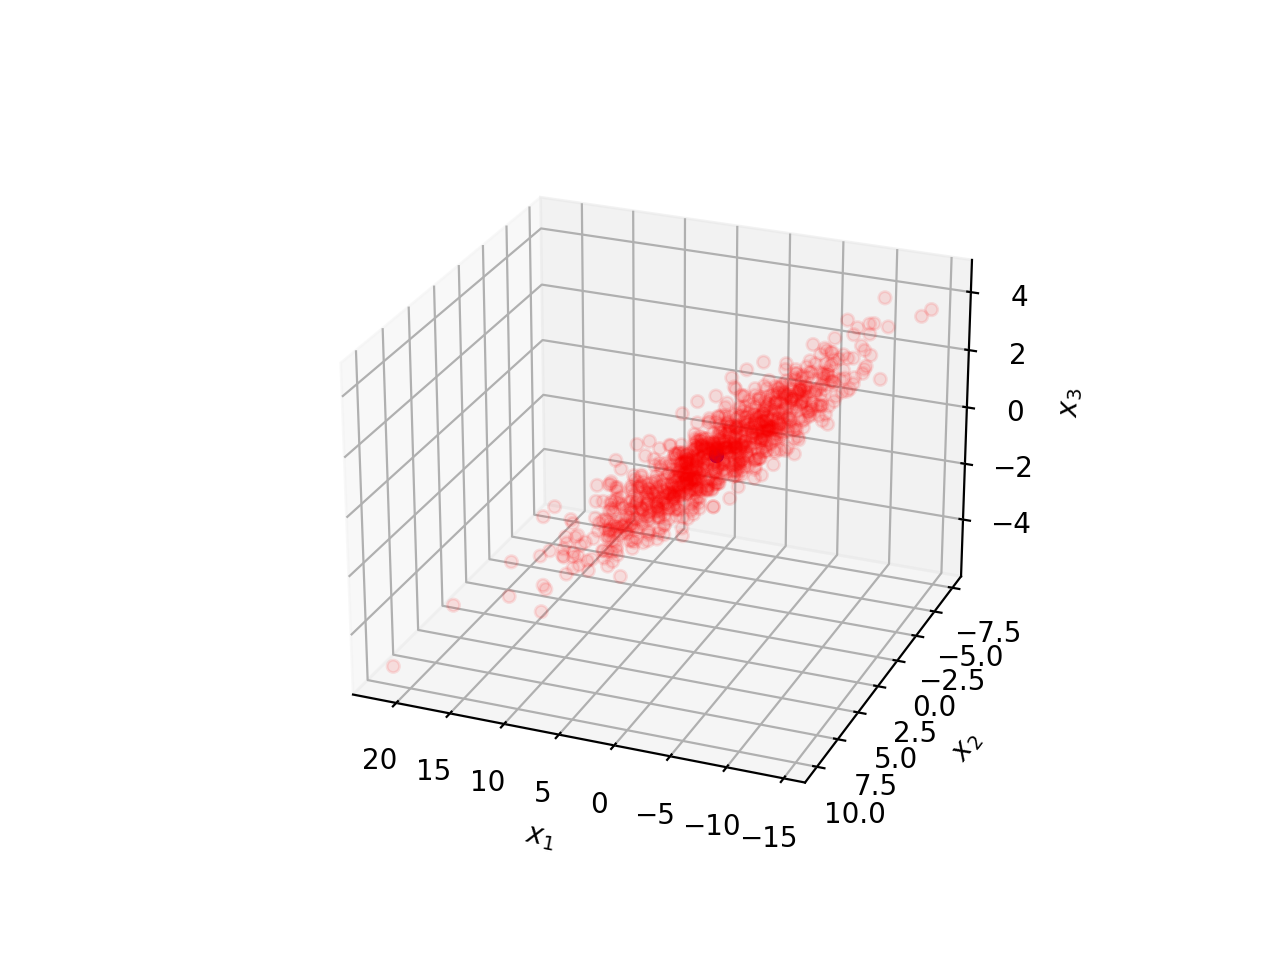

In [25]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()



Problem 2c comment:

Yes, now that the mean has been subtracted, the data appears to be well represented by a low-dimensional subspace centered on the origin.


In [186]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a

a = VT[0,:]
a

array([-0.87325954, -0.43370914,  0.2220679 ])

Problem 2d comment (1):

Since the data of matrix X is represented in the rows, we must perform PCA on the rows
In this case, the first principal component is given by the first column of V
Or equivalently the first row of VT.

<IPython.core.display.Javascript object>


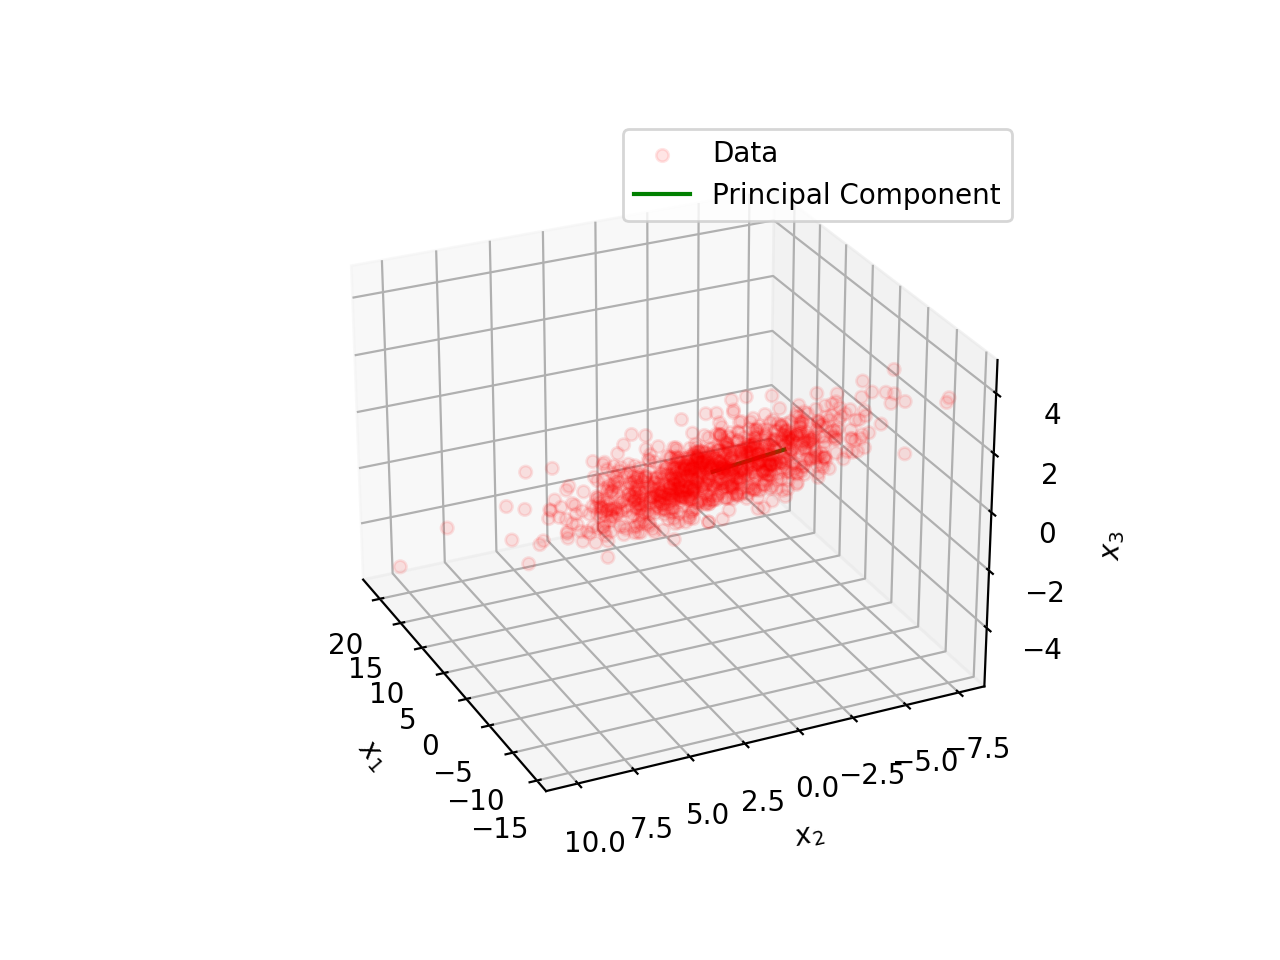

In [135]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='g',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()



Problem 2d comment (2):

As we can see, the data is well represented by this one dimensional subspace.

In [192]:
# Problem 2h

# Use SVD to find first and second principal components

U,s,VT = np.linalg.svd(X_m,full_matrices=False)
a2 = VT[0:2,:]
a2

array([[-0.87325954, -0.43370914,  0.2220679 ],
       [-0.24467994, -0.00379784, -0.96959646]])

<IPython.core.display.Javascript object>


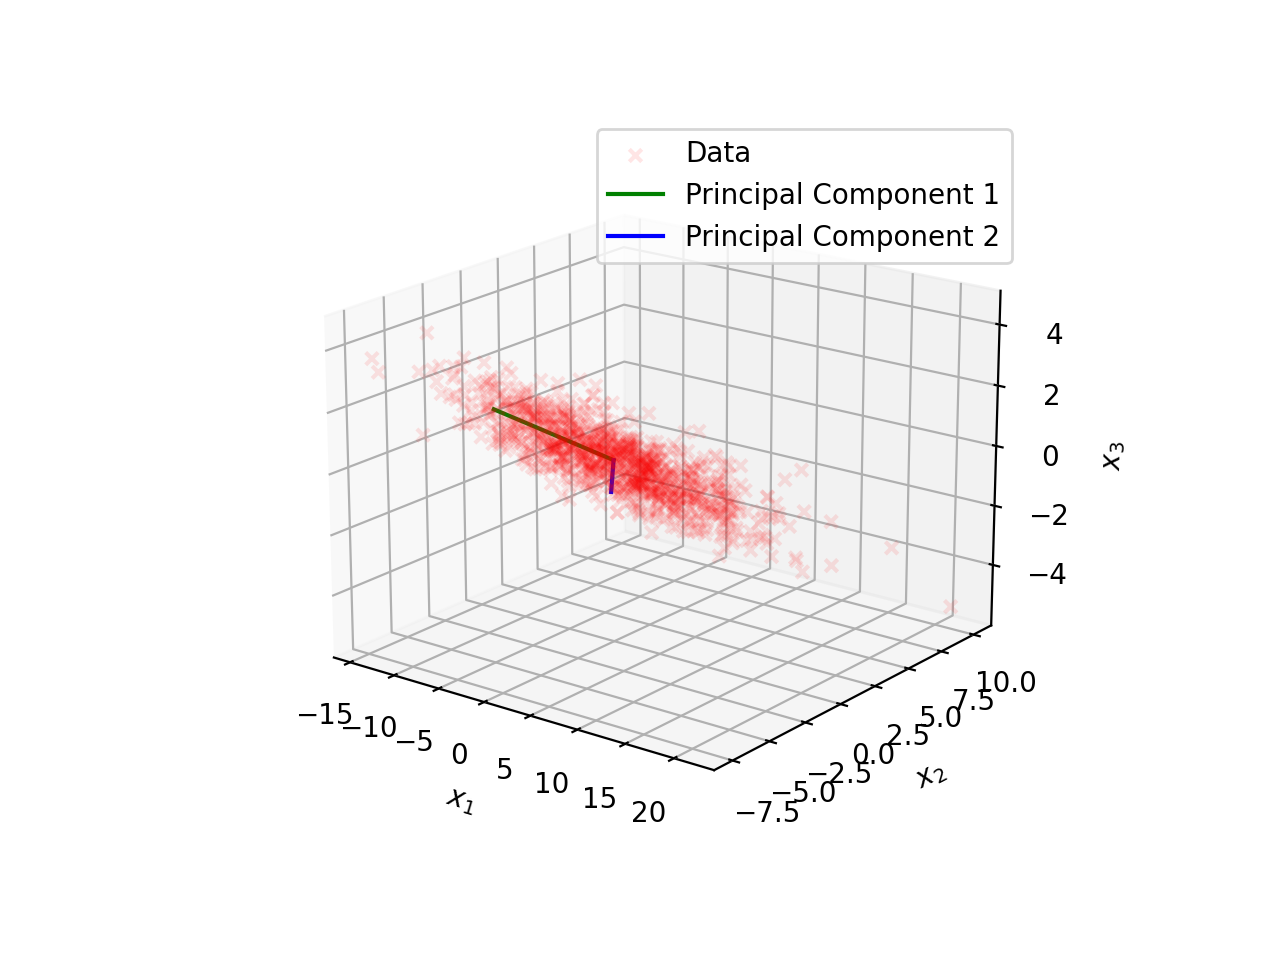

In [301]:
# display zero mean scatter plot and first & second principal components

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
s_sum = np.sum(s)
ss1 = s[0]/s_sum*10
ss2 = s[1]/s_sum*10

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='x', label='Data', alpha=0.1)

ax.plot([0,ss1*a2[0,0]],[0,ss1*a2[0,1]],[0,ss1*a2[0,2]], c='g',label='Principal Component 1')
ax.plot([0,ss2*a2[1,0]],[0,ss2*a2[1,1]],[0,ss2*a2[1,2]], c='b',label='Principal Component 2')


ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

In [291]:
# Problem 2i
# As follows from problem 2e solution,
# The rank-2 approximation is given by:
# x_z1 ~= v1^T * sigma_1 * [U]i,1 + v2^T * sigma_2 * [U]i,2

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

#x_z1_rank2 = (s[0] * U[0,0] * VT[0,:]) + (s[1] * U[i,0] * VT[0,:])

# define rank1 and rank2 approximations

def x_zi_rank1(i):
    return (s[0] * U[i,0] * VT[0,:])
    
def x_zi_rank2(i):
    return ( (s[0] * U[i,0] * VT[0,:]) + (s[1] * U[i,1] * VT[1,:]) )

# This should reconstruct the original X_m matrix
def x_zi_rank3(i):
    return ( (s[0] * U[i,0] * VT[0,:]) + (s[1] * U[i,1] * VT[1,:]) + (s[2] * U[i,2] * VT[2,:]))

print(x_zi_rank3(10), "\n", X_m[10])

[-5.96555563 -2.78729511  0.72139203] 
 [-5.96555563 -2.78729511  0.72139203]


In [264]:
# compute the rank-2 approximated data points
x_zi_rank2s = []
for a in range(np.shape(X)[0]):
    x_zi_rank2s.append(x_zi_rank2(a))
x_zi_rank2s = np.vstack(x_zi_rank2s)

In [300]:
x_zi_rank2s

array([[11.18430814,  5.3315948 , -0.88826538],
       [ 3.41454955,  1.65138299, -0.47852885],
       [ 2.09449227,  1.0523074 , -0.63838285],
       ...,
       [ 0.53520662,  0.22159313,  0.25147638],
       [ 1.59260018,  0.6570293 ,  0.76899203],
       [-4.80486921, -2.31211678,  0.57110436]])

<IPython.core.display.Javascript object>


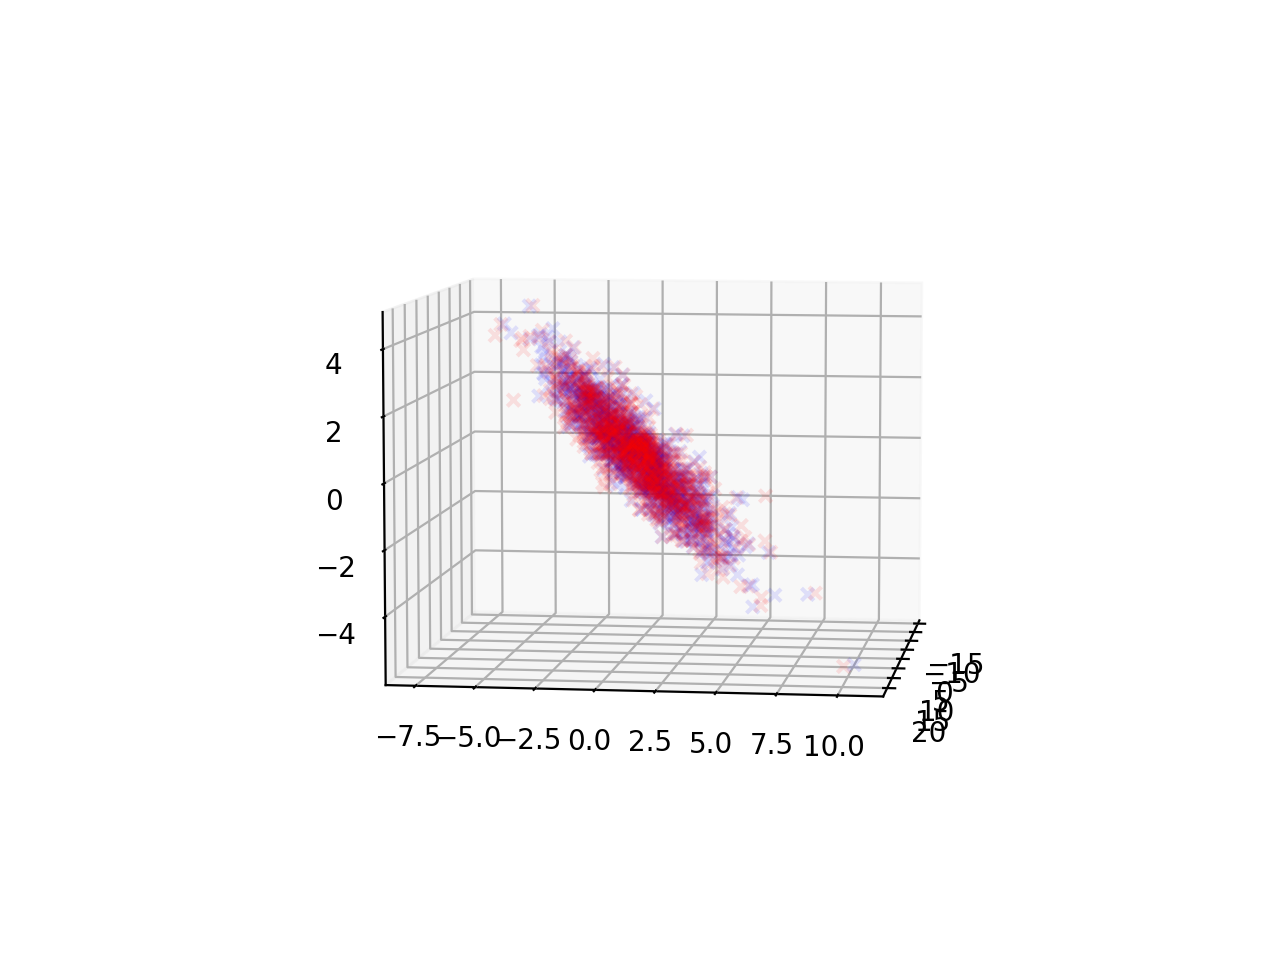

In [299]:
fig = plt.figure()
ax2i = fig.add_subplot(111, projection='3d')

ax2i.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='x', label='Data', alpha=0.1)
ax2i.scatter(x_zi_rank2s[:,0], x_zi_rank2s[:,1], x_zi_rank2s[:,2], c='b', marker='x', label='Data', alpha=0.1)


ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.legend()
plt.show()

Problem 2i comment:

The rank-2 approximation by definition lies in a 2-d plane. The plane appears to capture the dominant components of the data very well as variance in a 3rd orthogonal direction is comparatively low.

In [282]:
# Problem 2k

E_frobsquared_rank1 = s[1]**2 + s[2]**2
E_frobsquared_rank2 = s[2]**2

print(f"||E||frob ^2, rank1: {E_frobsquared_rank1}")
print(f"||E||frob ^2, rank2: {E_frobsquared_rank2}")

# Comment: We observe that the numerical value of (Frobenius norm of error)^2
# decreases starkly as the rank of the approximation increases from 1 to 2.

||E||frob ^2, rank1: 626.6899203862769
||E||frob ^2, rank2: 152.94557577886462


In [298]:
# Problem 3: 
subsets = np.split(X_m,8)
# Print the shape of each subset
for i, subset in enumerate(subsets):
    print(f"Subset {i+1} shape: {subset.shape}")

Subset 1 shape: (125, 3)
Subset 2 shape: (125, 3)
Subset 3 shape: (125, 3)
Subset 4 shape: (125, 3)
Subset 5 shape: (125, 3)
Subset 6 shape: (125, 3)
Subset 7 shape: (125, 3)
Subset 8 shape: (125, 3)


In [296]:
subsets[2]

array([], shape=(1000, 0), dtype=float64)